In [1]:
from zipfile import ZipFile

file_list = ['C:/Users/Aditya/Desktop/Geo-spatial Data/data.zip']

for archive in file_list:
    zfile = ZipFile(archive)
    zfile.extractall('C:/Users/Aditya/Desktop/Geo-spatial/data.zip')


In [2]:
import geopandas as gpd
shp_file = 'C:/Users/Aditya/Desktop/Geo-spatial Data/data/MetroGIS_Tax_Parcels_2014/Parcels2014Hennepin.dbf'

hennepin = gpd.read_file(shp_file)

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# change cell width
from IPython.core.display import display,HTML
display(HTML('<style>.container {width : 100% !important}</styke>'))

# show all columns(Important)(no ..... in between columns)
pd.options.display.max_columns =None

# no sci notation
pd.set_option('display.float_format', lambda x: '%.3f' %x)

# plot size
plt.rcParams['figure.figsize'] = 10,10

In [7]:
hennepin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 427762 entries, 0 to 427761
Data columns (total 70 columns):
Shape_Leng    427762 non-null float64
COUNTY_ID     427762 non-null object
PIN           427762 non-null object
BLDG_NUM      427762 non-null object
PREFIX_DIR    0 non-null object
PREFIXTYPE    0 non-null object
STREETNAME    427762 non-null object
STREETTYPE    0 non-null object
SUFFIX_DIR    0 non-null object
UNIT_INFO     51470 non-null object
CITY          427762 non-null object
CITY_USPS     414475 non-null object
ZIP           427762 non-null object
ZIP4          0 non-null object
PLAT_NAME     426333 non-null object
BLOCK         305269 non-null object
LOT           290705 non-null object
ACRES_POLY    427762 non-null float64
ACRES_DEED    427762 non-null float64
USE1_DESC     426337 non-null object
USE2_DESC     4398 non-null object
USE3_DESC     752 non-null object
USE4_DESC     207 non-null object
MULTI_USES    0 non-null object
LANDMARK      0 non-null obje

In [9]:
# check all the pin are unique

hennepin['PIN'].nunique(dropna= True)/ len(hennepin['PIN'])


1.0

In [10]:
# no2w set pin as index 
hennepin = hennepin.set_index(['PIN']).sort_index()

In [11]:
# unique values in columns
list(hennepin['GREEN_ACRE'].unique())

['N', 'Y']

In [13]:
columns_list = list(hennepin.select_dtypes(include=['object']).columns.values)
len(columns_list)

54

In [14]:
len(hennepin)

427762

In [28]:
# convert columns with string to 'categorical' type
def convert_to_categorical(df,cols):
    for col in cols:            
        unique_vals = len(df[col].unique())
#         calculate ratio of unique vaqlues to total rows 
        unique_ratio = unique_vals/len(df)
        if unique_ratio <= 0.2:
            df[col]=df[col].astype('category')
    return df


In [26]:
columns_list = list(hennepin.select_dtypes(include=['object']).columns.values)
# columns_list

In [27]:
columns_list.remove('geometry')

In [29]:
hennepin = convert_to_categorical(hennepin,columns_list)

In [31]:
hennepin.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 427762 entries, 053-0102724110003 to 053-3612123410019
Columns: 69 entries, Shape_Leng to geometry
dtypes: category(50), float64(13), int64(2), object(4)
memory usage: 96.1+ MB


In [36]:
# PROFILING THE DATA

# claculate summary of data frame by dropping geomery columns as it not supported
from pandas_summary import DataFrameSummary

# DataFrameSummary helip us to get summary of indiviual columns
hennepin_stats = DataFrameSummary(hennepin.drop('geometry',axis=1))

mean                                                               100417.396
std                                                                369414.051
variance                                                     136466741168.443
min                                                                     0.000
max                                                              96791600.000
5%                                                                      0.000
25%                                                                 25300.000
50%                                                                 50200.000
75%                                                                100000.000
95%                                                                267600.000
iqr                                                                 74700.000
kurtosis                                                            13820.561
skewness                                                        

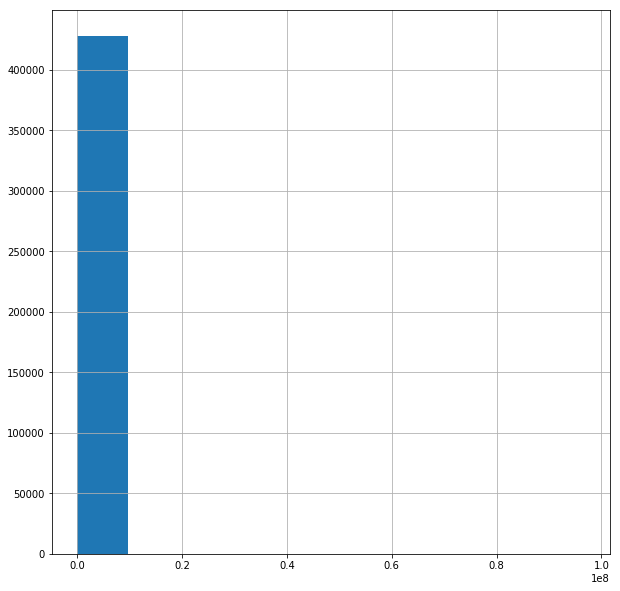

In [37]:
hennepin_stats['EMV_LAND']

In [38]:
hennepin_stats

In [39]:
hennepin_stats.columns_stats

,Shape_Leng,COUNTY_ID,BLDG_NUM,PREFIX_DIR,PREFIXTYPE,STREETNAME,STREETTYPE,SUFFIX_DIR,UNIT_INFO,CITY,CITY_USPS,ZIP,ZIP4,PLAT_NAME,BLOCK,LOT,ACRES_POLY,ACRES_DEED,USE1_DESC,USE2_DESC,USE3_DESC,USE4_DESC,MULTI_USES,LANDMARK,OWNER_NAME,OWNER_MORE,OWN_ADD_L1,OWN_ADD_L2,OWN_ADD_L3,TAX_NAME,TAX_ADD_L1,TAX_ADD_L2,TAX_ADD_L3,HOMESTEAD,EMV_LAND,EMV_BLDG,EMV_TOTAL,TAX_CAPAC,TOTAL_TAX,SPEC_ASSES,TAX_EXEMPT,XUSE1_DESC,XUSE2_DESC,XUSE3_DESC,XUSE4_DESC,DWELL_TYPE,HOME_STYLE,FIN_SQ_FT,GARAGE,GARAGESQFT,BASEMENT,HEATING,COOLING,YEAR_BUILT,NUM_UNITS,SALE_DATE,SALE_VALUE,SCHOOL_DST,WSHD_DIST,GREEN_ACRE,OPEN_SPACE,AG_PRESERV,AGPRE_ENRD,AGPRE_EXPD,PARC_CODE,TORRENS,Shape_Le_1,Shape_Area
counts,427762,427762,427762,0,0,427762,0,0,51470,427762,414475,427762,0,426333,305269,290705,427762,427762,426337,4398,752,207,0,0,426336,0,0,0,0,426337,426189,426071,62165,426337,427762,427762,427762,427762,427762,427762,427762,17641,1341,250,36,0,152400,427762,157514,157514,111420,156532,157514,427762,0,331140,427762,426337,350447,427762,427762,427762,0,0,427762,427762,427762,427762
uniques,364728,1,21678,0,0,7387,0,0,6849,47,48,78,0,18487,217,391,3556,1,45,34,18,10,0,0,359131,0,0,0,0,357605,356554,54603,3192,2,9151,12417,14890,16850,27282,4282,2,38,25,9,3,0,15,4666,2,1443,2,6,4,163,0,552,40903,23,8,2,2,2,0,0,1,3,364358,365041
missing,0,0,0,427762,427762,0,427762,427762,376292,0,13287,0,427762,1429,122493,137057,0,0,1425,423364,427010,427555,427762,427762,1426,427762,427762,427762,427762,1425,1573,1691,365597,1425,0,0,0,0,0,0,0,410121,426421,427512,427726,427762,275362,0,270248,270248,316342,271230,270248,0,427762,96622,0,1425,77315,0,0,0,427762,427762,0,0,0,0
missing_perc,0%,0%,0%,100%,100%,0%,100%,100%,87.97%,0%,3.11%,0%,100%,0.33%,28.64%,32.04%,0%,0%,0.33%,98.97%,99.82%,99.95%,100%,100%,0.33%,100%,100%,100%,100%,0.33%,0.37%,0.40%,85.47%,0.33%,0%,0%,0%,0%,0%,0%,0%,95.88%,99.69%,99.94%,99.99%,100%,64.37%,0%,63.18%,63.18%,73.95%,63.41%,63.18%,0%,100%,22.59%,0%,0.33%,18.07%,0%,0%,0%,100%,100%,0%,0%,0%,0%
types,numeric,constant,categorical,unique,unique,categorical,unique,unique,categorical,categorical,categorical,categorical,unique,categorical,categorical,categorical,numeric,constant,categorical,categorical,categorical,categorical,unique,unique,categorical,unique,unique,unique,unique,categorical,categorical,categorical,categorical,bool,numeric,numeric,numeric,numeric,numeric,numeric,bool,categorical,categorical,categorical,categorical,unique,categorical,numeric,bool,categorical,bool,categorical,categorical,numeric,unique,categorical,numeric,categorical,categorical,bool,bool,bool,unique,unique,constant,categorical,numeric,numeric


In [40]:
hennepin.columns

Index(['Shape_Leng', 'COUNTY_ID', 'BLDG_NUM', 'PREFIX_DIR', 'PREFIXTYPE',
       'STREETNAME', 'STREETTYPE', 'SUFFIX_DIR', 'UNIT_INFO', 'CITY',
       'CITY_USPS', 'ZIP', 'ZIP4', 'PLAT_NAME', 'BLOCK', 'LOT', 'ACRES_POLY',
       'ACRES_DEED', 'USE1_DESC', 'USE2_DESC', 'USE3_DESC', 'USE4_DESC',
       'MULTI_USES', 'LANDMARK', 'OWNER_NAME', 'OWNER_MORE', 'OWN_ADD_L1',
       'OWN_ADD_L2', 'OWN_ADD_L3', 'TAX_NAME', 'TAX_ADD_L1', 'TAX_ADD_L2',
       'TAX_ADD_L3', 'HOMESTEAD', 'EMV_LAND', 'EMV_BLDG', 'EMV_TOTAL',
       'TAX_CAPAC', 'TOTAL_TAX', 'SPEC_ASSES', 'TAX_EXEMPT', 'XUSE1_DESC',
       'XUSE2_DESC', 'XUSE3_DESC', 'XUSE4_DESC', 'DWELL_TYPE', 'HOME_STYLE',
       'FIN_SQ_FT', 'GARAGE', 'GARAGESQFT', 'BASEMENT', 'HEATING', 'COOLING',
       'YEAR_BUILT', 'NUM_UNITS', 'SALE_DATE', 'SALE_VALUE', 'SCHOOL_DST',
       'WSHD_DIST', 'GREEN_ACRE', 'OPEN_SPACE', 'AG_PRESERV', 'AGPRE_ENRD',
       'AGPRE_EXPD', 'PARC_CODE', 'TORRENS', 'Shape_Le_1', 'Shape_Area',
       'geometry'],
      dtyp

In [41]:
drop_cols = ['AGPRE_ENRD', 'AGPRE_EXPD', 'COUNTY_ID', 'DWELL_TYPE', 'LANDMARK', 'MULTI_USES', 
             'NUM_UNITS', 'OWNER_MORE', 'OWN_ADD_L1', 'OWN_ADD_L2', 'OWN_ADD_L3', 'PARC_CODE', 
             'PREFIXTYPE', 'PREFIX_DIR', 'STREETTYPE', 'SUFFIX_DIR', 'ZIP4']
hennepin = hennepin.drop(drop_cols,axis=1)

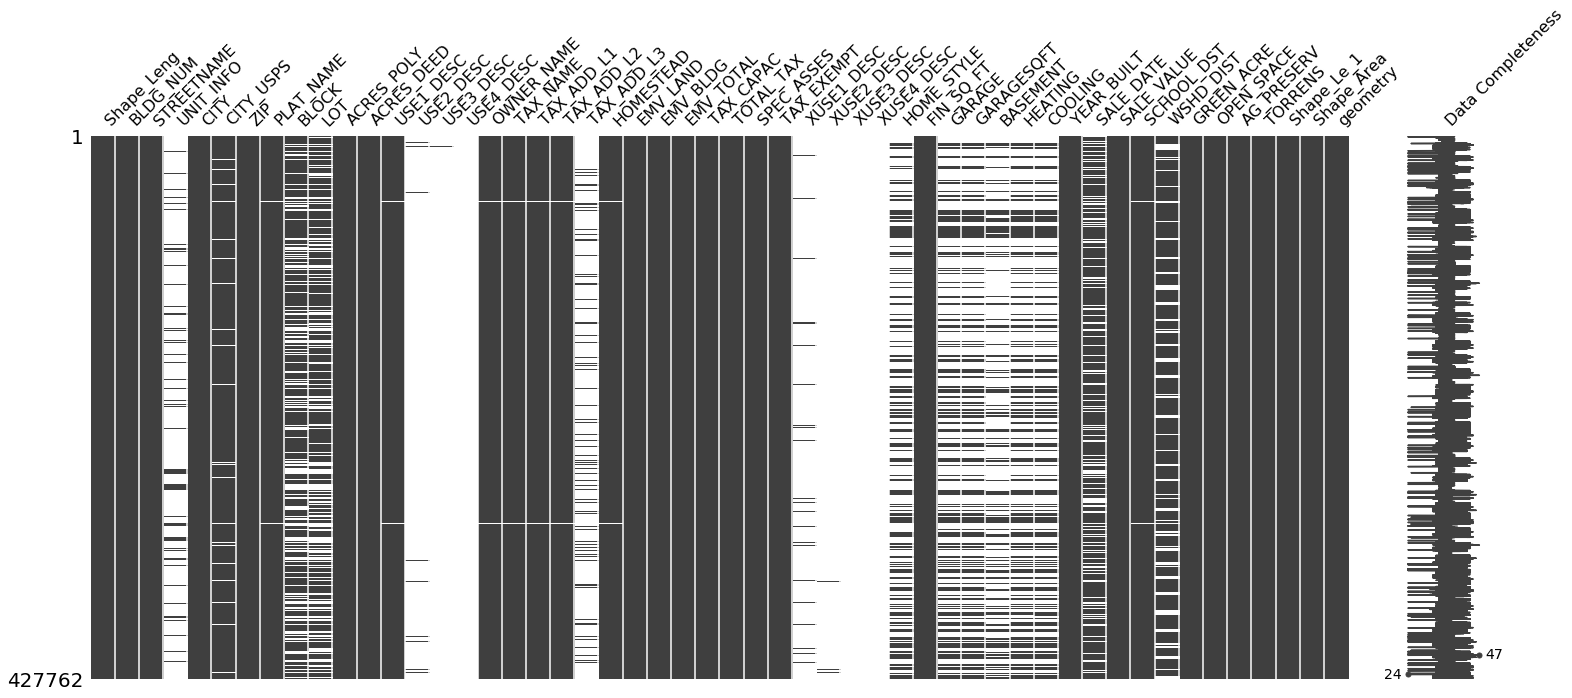

In [44]:
import missingno as msno
msno.matrix(hennepin,labels = True)

In [46]:
def delete_near_null(df,cols,populated_threshold= 0.01):
    for col in cols:
        non_null_rows = df[col].count()
        total_rows = len(df[col])
        populated_ratio = non_null_rows/total_rows
        if populated_ratio <= populated_threshold:
            del df[col]
    return df

In [47]:
# full list of columns
columns_list = list(hennepin.columns.values)

In [48]:
columns_list.remove('geometry')

In [49]:
hennepin = delete_near_null(hennepin, columns_list)

In [50]:
hennepin.shape

(427762, 47)

In [51]:
# filter ou points
hennepin = hennepin[hennepin['geometry'].geom_type != 'Point']

In [53]:
# hennepin['geometry']

In [54]:
# we can do all the analysis to all geospatial data so we divide it into smaller parts
mpls = hennepin[hennepin['CITY']=='MINNEAPOLIS']

In [55]:
mpls.shape

(129889, 47)

## Join and merge two data analysis
## review lakes and rivers data


In [56]:
shp_file = 'C:/Users/Aditya/Desktop/Geo-spatial Data/data/MetCouncil_Lakes_Rivers/LakesAndRivers.dbf'

In [57]:
water_df = gpd.read_file(shp_file).set_index(['OWF_ID']).sort_index()

In [58]:
water_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2349 entries, 00640874 to 99002540
Data columns (total 7 columns):
SYSTEM        2349 non-null object
NAME_DNR      1588 non-null object
ALT_NAME      210 non-null object
AREA_ACRES    2349 non-null float64
Shape_Leng    2349 non-null float64
Shape_Area    2349 non-null float64
geometry      2349 non-null object
dtypes: float64(3), object(4)
memory usage: 146.8+ KB


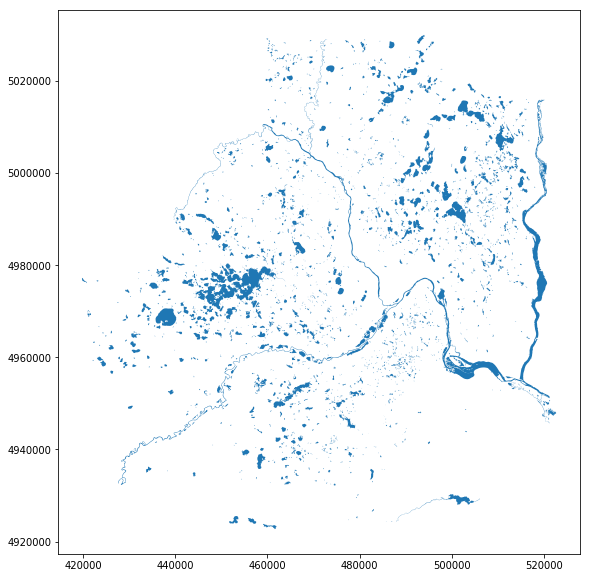

In [59]:
# plot water feature in twin cities area

water_df.plot()
plt.show()

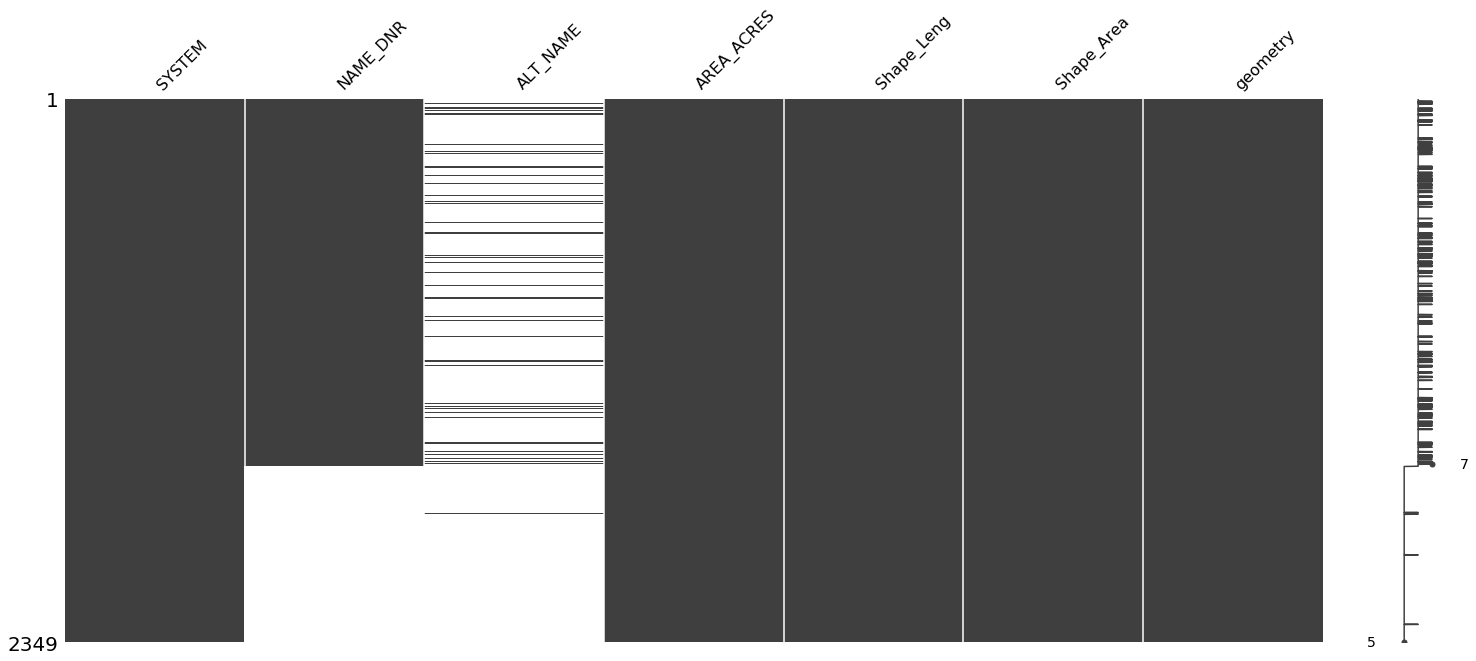

In [60]:
msno.matrix(water_df)

#  Geosaptial  transformation

In [62]:
# filter down the data into small subset as  computation is expensive so filter down data with name  'Cedar' 

cedar_lake= water_df[water_df['NAME_DNR'] == 'Cedar']
cedar_lake

,SYSTEM,NAME_DNR,ALT_NAME,AREA_ACRES,Shape_Leng,Shape_Area,geometry
OWF_ID,,,,,,,
27003900,Lake,Cedar,None,168.410,4803.871,681542.105,"POLYGON ((474663.9454 4979190.5593, 474684.879..."
70009100,Lake,Cedar,None,793.480,11307.426,3211136.072,"POLYGON ((458834.4773 4938960.6654, 458842.693..."


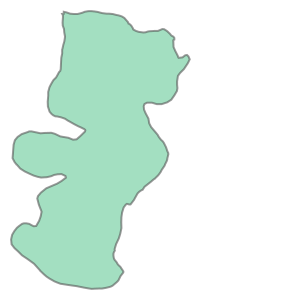

In [63]:
# their are two lake name cedar so let take one lake shape
cedar_lake['geometry'].iloc[0]

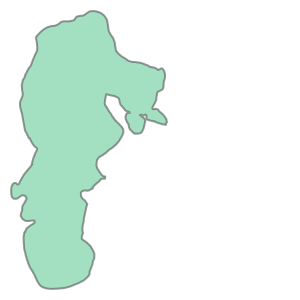

In [64]:
cedar_lake['geometry'].iloc[1]

In [65]:
# filter down the first lake
cedar_lake = cedar_lake.iloc[[0]]

In [66]:
cedar_lake

,SYSTEM,NAME_DNR,ALT_NAME,AREA_ACRES,Shape_Leng,Shape_Area,geometry
OWF_ID,,,,,,,
27003900,Lake,Cedar,None,168.410,4803.871,681542.105,"POLYGON ((474663.9454 4979190.5593, 474684.879..."


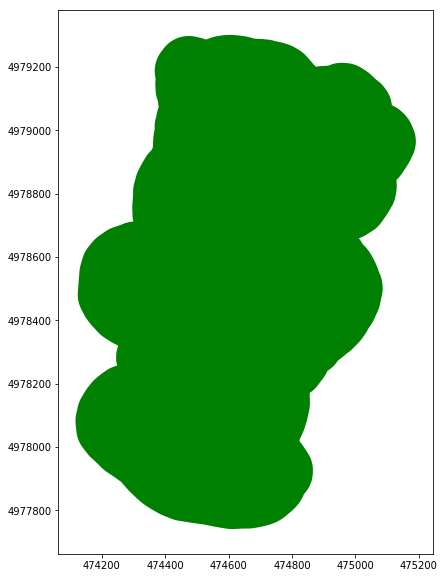

In [74]:
# lets expand our search not only the search the boundaryb of the lake.
# we can accomplish this by 'buffering' aking the shape bigger in all the direction. let do 100m for goo measure

                         
buffered_cedar_lake = cedar_lake.buffer(100)
ax = cedar_lake.plot(color='red')

buffered_cedar_lake.plot(ax=ax, color='green')
plt.show()








In [75]:
buffered_cedar_poly = buffered_cedar_lake.iloc[0]

In [76]:
spatial_index =mpls.sindex 

In [86]:
cedar_bb = buffered_cedar_poly.bounds
cedar_bb

(474116.7938611487, 4977740.731593291, 475191.1664816106, 4979300.6081)

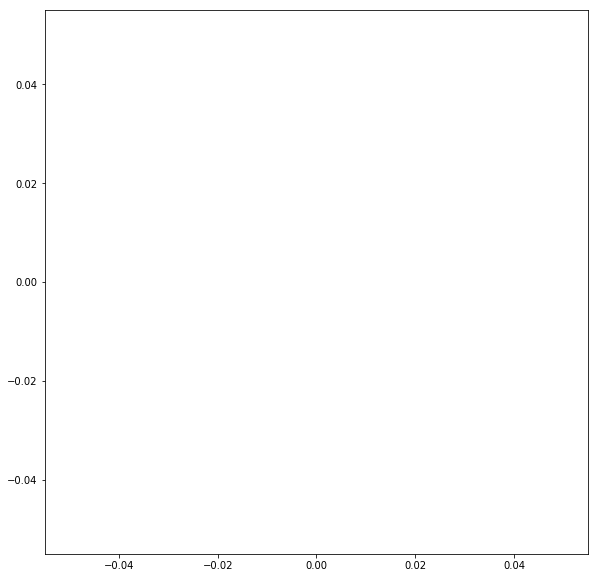

In [89]:
from shapely.geometry import box
from descartes import PolygonPatch

# convert the bounding box tuple into a polygon
cedar_box = box(cedar_bb[0], cedar_bb[1], cedar_bb[2], cedar_bb[3])

# plot the rectangle
fig= plt.figure()
ax= fig.gca()

# ensure we aren't distorting the image
ax.axis('scaled')
buffered_cedar_lake.plot(ax=ax)
plt.show()

In [90]:
#Now we find all of the index values of the Minneapolis Tax Parcels that intersect with this bounding box
possible_matches_index = list(spatial_index.intersection(cedar_bb))

In [91]:
#Now we can select those parcels by their index values
possible_matches = mpls.iloc[possible_matches_index]
possible_matches.shape

(457, 47)

In [94]:

# Now that was fairly quick and we've gone from 100k+ records down to a handful.

# Next we look at those that actually touch that 100m buffer around Cedar Lake
precise_matches = possible_matches[possible_matches.intersects(buffered_cedar_poly)]
precise_matches.shape

(208, 47)

In [95]:

# Now that was fairly quick and we've gone from 100k+ records down to a handful.

# Next we look at those that actually touch that 100m buffer around Cedar Lake

precise_matches = possible_matches[possible_matches.intersects(buffered_cedar_poly)]
precise_matches.shape

(208, 47)

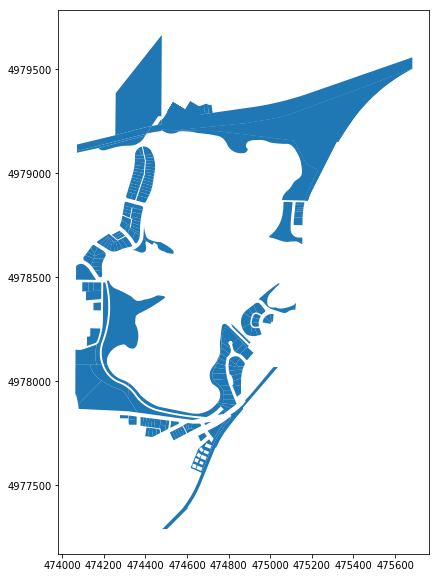

In [96]:
precise_matches.plot()
plt.show()

In [97]:

# .copy() ensures we aren't mucking up the mpls dataframe since precise_matches is just a slice of it.# .copy 
cedar_lake_parcels = precise_matches.copy()
cedar_lake_parcels['LAKE_NAME'] = 'Cedar Lake'

# joining tabular data with geospatial data

In [104]:
txt = 'C:/Users/Aditya/Desktop/Geo-spatial Data/data/MN_PCA_Cedar_Lake/cedar_lake_qual.csv'

lake_qual = pd.read_csv(txt,parse_dates=['sampleDate','analysisDate'],na_values='(null)')
# lake_qual.head()
lake_qual.columns

Index(['analysisDate', 'collectingOrg', 'comments', 'county', 'gtlt',
       'parameter', 'result', 'resultUnit', 'sampleDate', 'sampleTime',
       'sampleDepthUnit', 'sampleFractionType', 'sampleLowerDepth',
       'sampleType', 'sampleUpperDepth', 'stationId', 'stationName',
       'statisticType', 'testMethodId', 'testMethodName'],
      dtype='object')

In [105]:
lake_qual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 20 columns):
analysisDate          29531 non-null datetime64[ns]
collectingOrg         29531 non-null object
comments              56 non-null object
county                29531 non-null object
gtlt                  1035 non-null object
parameter             29531 non-null object
result                29443 non-null object
resultUnit            29393 non-null object
sampleDate            29531 non-null datetime64[ns]
sampleTime            29531 non-null object
sampleDepthUnit       29531 non-null object
sampleFractionType    29531 non-null object
sampleLowerDepth      2525 non-null float64
sampleType            29531 non-null object
sampleUpperDepth      29523 non-null float64
stationId             29531 non-null object
stationName           29531 non-null object
statisticType         1 non-null object
testMethodId          29531 non-null object
testMethodName        29531 non-null object
dt

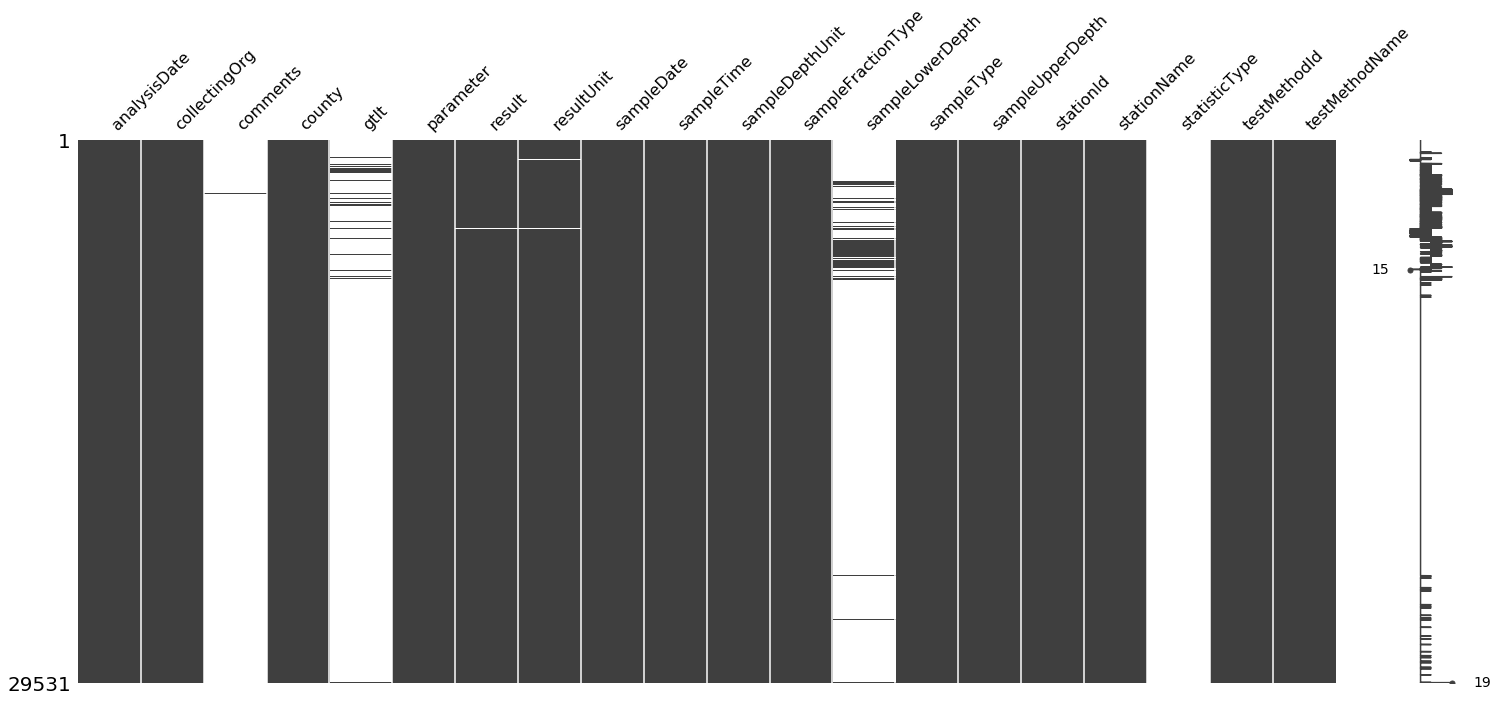

In [106]:
msno.matrix(lake_qual)